In [1]:
#%matplotlib inline
%matplotlib widget
from ipyleaflet import *
import ipywidgets as widgets
from ipywidgets import HTML, Layout, IntSlider, RadioButtons, Dropdown, Button, Output, Label
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import random
import json
import netCDF4 as nc

# from deb.simulations import simulate_deb, plot_res, aux, fArr

In [2]:
# Variable setup
x, y = 0, 0
dummy_num = 0
with open('data/MED_farms/MED_farms_for_display.geojson', 'r') as f:
    data = json.load(f)
name = None

In [3]:
# Map setup
defaultLayout = Layout(width='1200px', height='500px')
center = (40,20)
icon = Icon(icon_url='', icon_size=[38, 95])
m = Map(center=center,
       basemap=basemaps.Esri.WorldImagery,
        zoom=4,
       layout=defaultLayout)

species_label = Label(layout=Layout(width="100%"))
title_label = HTML(value = "<p style='font-size:30px'>Welcome to PERfeCt!</p> <br> Select a location in the Mediterranean, then select a species and climate change scenario...")

def handle_map_click(**kwargs):
    if kwargs.get('type') == 'click':
        global x
        global y
        global dummy_num
        global feature_clicked
        global temp_marker
        try:
            m.remove_layer(temp_marker)
        except:
            pass
        temp_marker = Marker(
                location=kwargs.get('coordinates'),
                icon=icon,
                name="Location info")           
        #print("You clicked on: ", kwargs.get('coordinates'))
               
        x, y = kwargs.get('coordinates')
        dummy_num += 1
        message = HTML()
        message.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br> Number: {dummy_num}"
        species_label.value = "No aquaculture selected"
        popup = Popup(
            location=(x, y),
            child=message,
            close_button=True,
            auto_close=True,
            close_on_escape_key=True,
            max_width = 400,
            name = "Location info"
        )
        m.add_layer(popup)
        m.add_layer(temp_marker)
        feature_clicked=False
        
m.on_interaction(handle_map_click)

geo_json = GeoJSON(
    data=data,
    style = {
        "opacity": 100},
    name="Farm locations"
)

def marker_click_handler(event=None, feature=None, id=None, properties=None):
    global name
    global feature_clicked
    global dummy_num
    feature_clicked=True
    dummy_num += 1
    try:
        m.remove_layer(temp_marker)
    except:
        pass
    #name = properties["geounit"]
    name = properties["species"]
    if name == None:
        name = properties["species 1"]
    x = properties["coordinates"][1]
    y = properties["coordinates"][0]
    species_label.value = f"Species: {name}"
    message = HTML()
    message.value = f"Coordinates: ({np.round(x,2)}, {np.round(y,2)}) <br> Species: {name[name.find('(')+1:name.find(')')]} <br> Number: {dummy_num}"
    popup = Popup(
            location=(x, y),
            child=message,
            close_button=True,
            auto_close=True,
            close_on_escape_key=True,
            max_width = 400,
            name = "Location info"
        )
    m.add_layer(popup)

geo_json.on_click(marker_click_handler)

m.add_layer(geo_json)

control = LayersControl(position='topright')
m.add_control(control)


HTML(value="<p style='font-size:30px'>Welcome to PERfeCt!</p> <br> Click on any location in the Mediterranean,…

Map(center=[40, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

Label(value='', layout=Layout(width='100%'))

Dropdown(description='Species:', options=('Argyrosomus_regius', 'Dentex_dentex', 'Dicentrarchus_labrax', 'Dipl…

RadioButtons(description='Scenario:', options=('RCP4.5', 'RCP8.5'), value='RCP4.5')

Button(description='Simulate!', style=ButtonStyle())

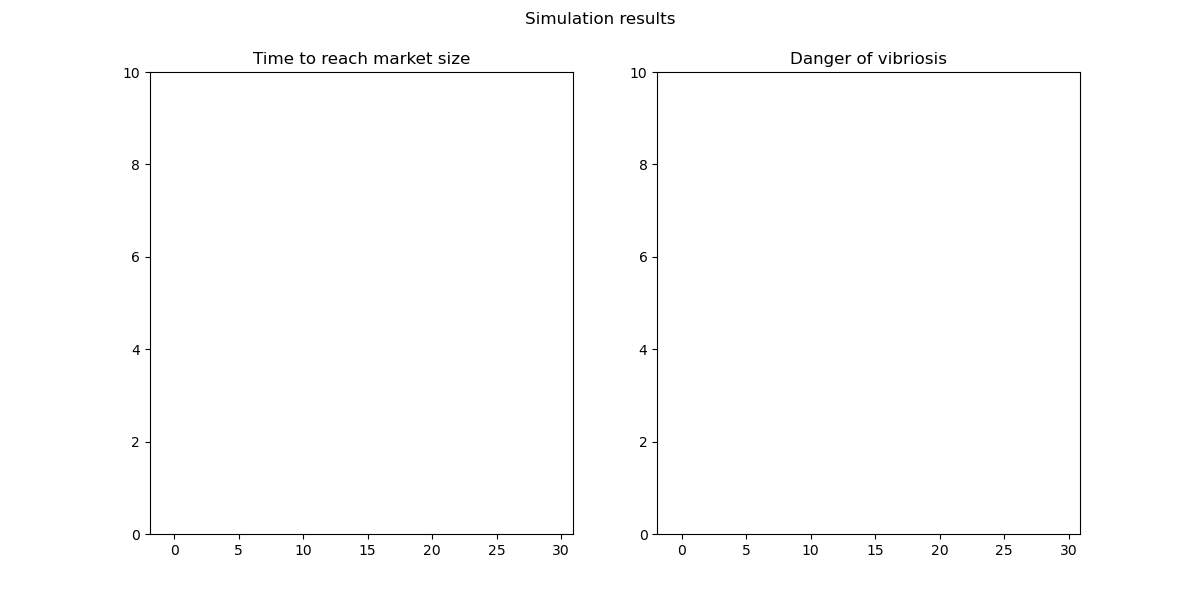

In [4]:
display(title_label)
display(m)
# Print results
display(species_label)

options = [
    'Argyrosomus_regius',
    'Dentex_dentex',
    'Dicentrarchus_labrax',
    'Diplodus_puntazzo',
    'Diplodus_sargus',
    'Diplodus_vulgaris',
    'Lithognathus_mormyrus',
    'Oncorhynchus_mykiss',
    'Pagellus_erythrinus',
    'Salmo_salar',
    'Sarpa_salpa',
    'Sciaena_umbra',
    'Seriola_dumerili',
    'Sparus_aurata',
    'Thunnus_thynnus']

scenarios = ["RCP4.5", "RCP8.5"]

dropdown = Dropdown(
    options=options,
    value = options[0],
    description = "Species:",
    disabled = False)

radios = RadioButtons(
    options=scenarios,
    description="Scenario:",
    disabled=False
)

display(dropdown)
display(radios)

btn = Button(description="Simulate!")
out = Output()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
bar1 = ax[0].bar(np.arange(0, 30, 1), np.zeros(30))
bar2 = ax[1].bar(np.arange(0, 30, 1), np.zeros(30))
title1 = ax[0].set_title("Time to reach market size")
title2 = ax[1].set_title("Danger of vibriosis")
ax[0].set_ylim(0, 10)
ax[1].set_ylim(0, 10)
fig.suptitle("Simulation results")


def update(change):
    for i in range(30):
        bar1[i].set_height(np.random.randint(1, 10, 1))
        bar2[i].set_height(np.random.randint(1, 10, 1))
    ax[0].set_title(f"Time to market size {dropdown.value} - {radios.value}")
    ax[1].set_title(f"Danger of vibriosis - {radios.value}")
    fig.canvas.draw()
    return


#line1, = ax[0].plot(np.linspace(0,10), np.linspace(0,10))
#line2, = ax[1].plot(np.linspace(0,10), np.linspace(0,10))


def update1(change):
    line1.set_ydata(np.random.randint(0, 10, 50))
    line2.set_ydata(np.random.randint(0, 10, 50))
    ax[0].set_title(f"Time to market size {dropdown.value} - {radios.value}")
    ax[1].set_title(f"Danger of vibriosis - {radios.value}")
    fig.canvas.draw()
    return

#radios.observe(update, "value")

btn.on_click(update)

display(btn)
